In [2]:
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
tips = sns.load_dataset('tips')

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


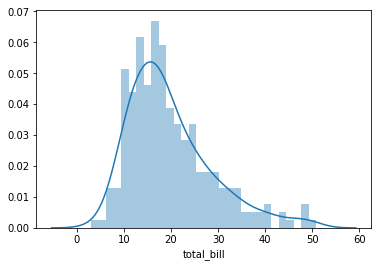

In [12]:
sns.distplot(tips['total_bill'], bins = 30)#univariate plotting DIStRIBUTION
#HISTOGRAM, BINS affect to the prisiceness of bars

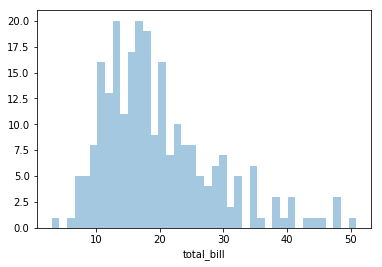

In [13]:
sns.distplot(tips['total_bill'],kde = False,bins = 40) #withoit curve

In [14]:
#JOINTPLOT

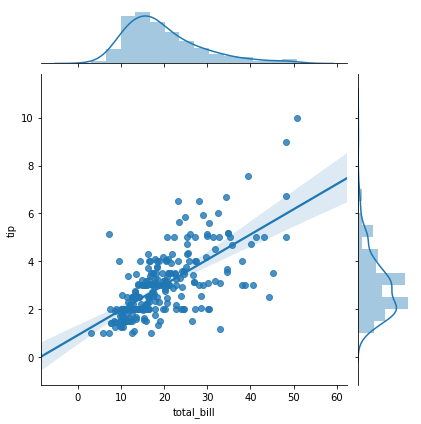

In [20]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind = 'reg')
# to compare to parameters
# kind allows to change the way of representing data

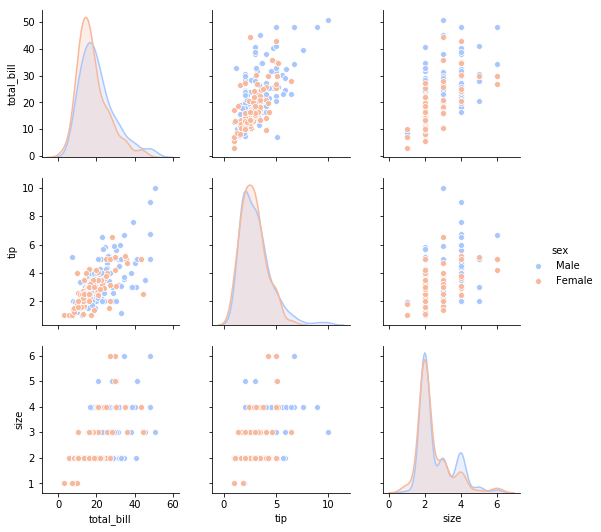

In [27]:
sns.pairplot(tips, hue = 'sex',palette = 'coolwarm')
# hue sends categorical parameters
#pallete allows color the tables
#make a combination of every parameters

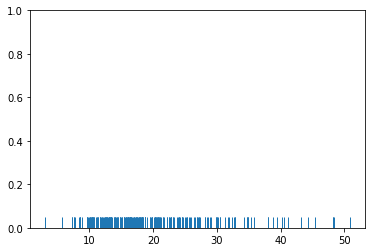

In [28]:
sns.rugplot(tips['total_bill']) 
# kde = kernel density estimation
#shows the density of the data

(0, 1)

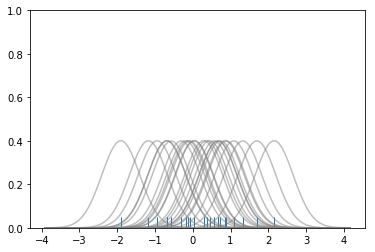

In [29]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

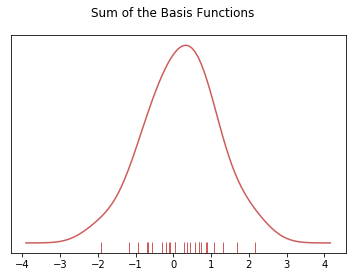

In [30]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

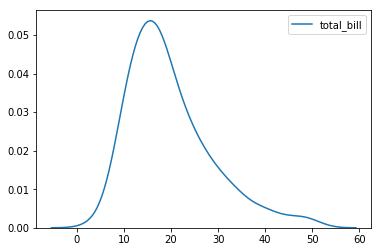

In [31]:
sns.kdeplot(tips['total_bill'])

In [36]:
#categorical plots

In [38]:
# our own func
import numpy as np

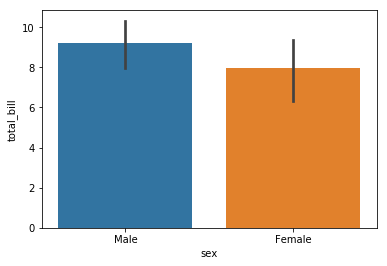

In [41]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)
# shows the average num for the categories
# estimator allows us to change the estimation of the bar charts

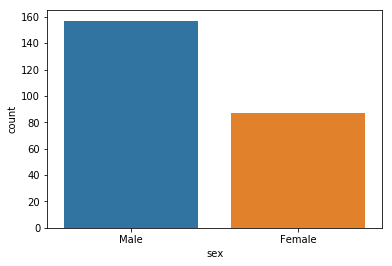

In [44]:
sns.countplot(x='sex',data=tips)
#count the number of categories, occurences

In [45]:
# shows the distribution of category

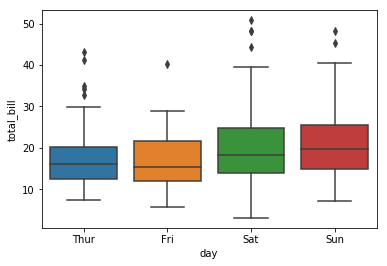

In [46]:
sns.boxplot(x='day',y='total_bill',data=tips)

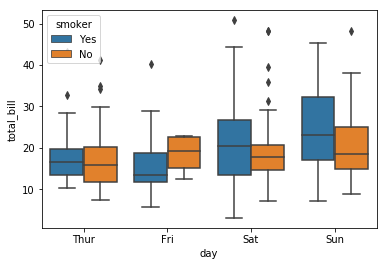

In [47]:
 sns.boxplot(x='day',y='total_bill',data=tips,hue = 'smoker')

In [48]:
 #voilin plot

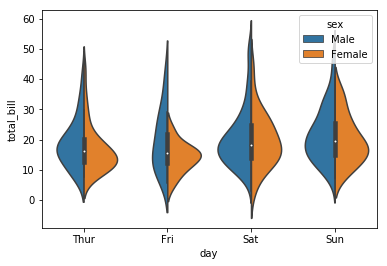

In [53]:
sns.violinplot(x='day',y='total_bill',data=tips, hue='sex', split = True)

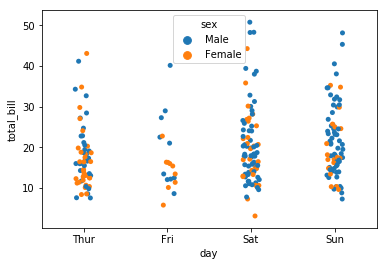

In [57]:
#STRIPLOT
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True, hue='sex')

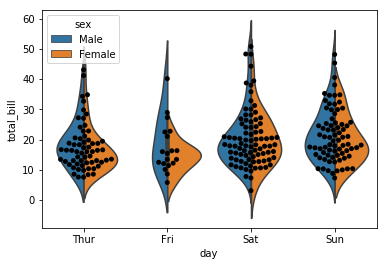

In [62]:
# SWARMPLOT
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex', split = True)
sns.swarmplot(x='day',y='total_bill',data=tips, color = 'black')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


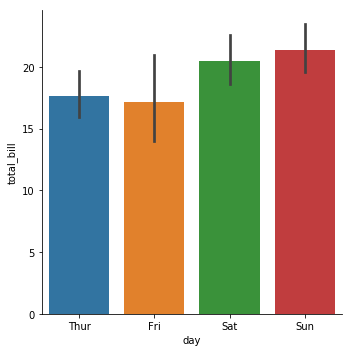

In [64]:
#Factorplot
sns.factorplot(x='day',y='total_bill',data=tips,kind = 'bar')

In [65]:
#matrix plots

In [66]:
flights = sns.load_dataset('flights')

In [67]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [70]:
tc=tips.corr()

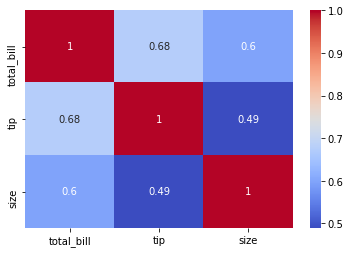

In [73]:
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [76]:
flights
#converting to matrix form
fp = flights.pivot_table(index = 'month',columns = 'year', values = 'passengers')

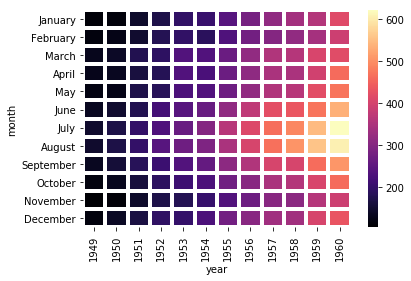

In [88]:
sns.heatmap(fp,cmap = 'magma',linecolor = 'white', lw=3)
#lw makes the separation between the sells

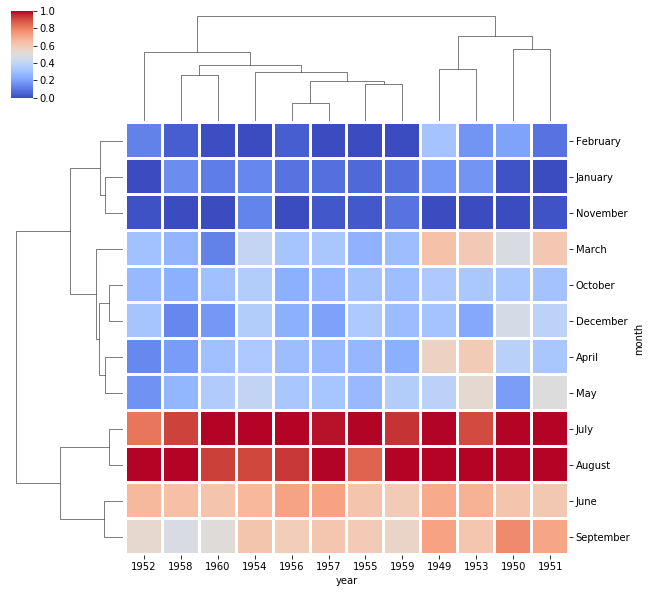

In [94]:
sns.clustermap(fp, lw = 2, linecolor = 'white',cmap = 'coolwarm', standard_scale = 1)
#clusters information which are most similar to each other

In [95]:
#GRIDS

In [96]:
iris = sns.load_dataset('iris')

In [97]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [98]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

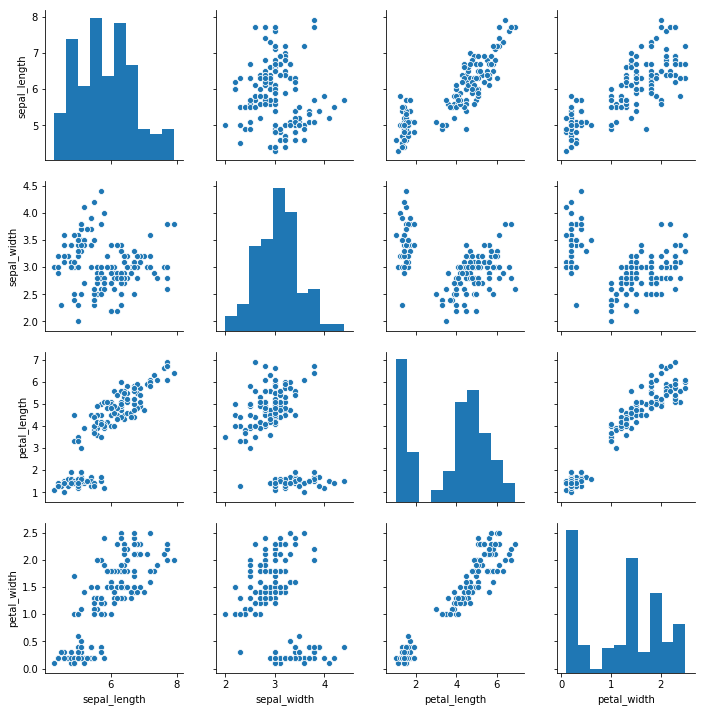

In [99]:
sns.pairplot(iris)

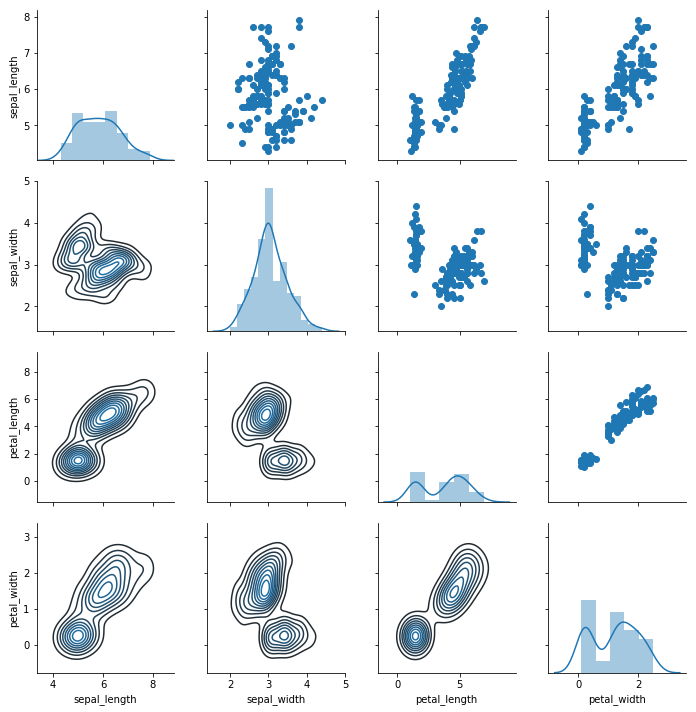

In [103]:
g = sns.PairGrid(iris)
# the same thing as pairplot but allows us to change the graphs manually
# g.map(plt.scatter)
g.map_diag(sns.distplot)
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter)

In [105]:
tips = sns.load_dataset('tips')

In [106]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


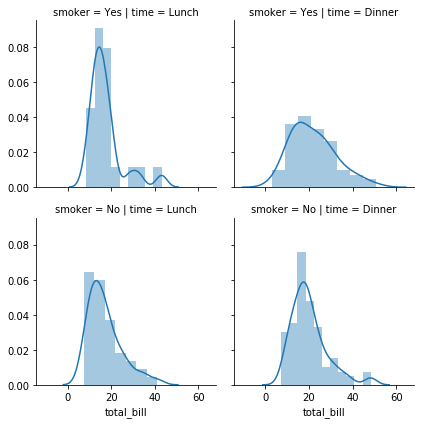

In [109]:
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(sns.distplot,'total_bill') 

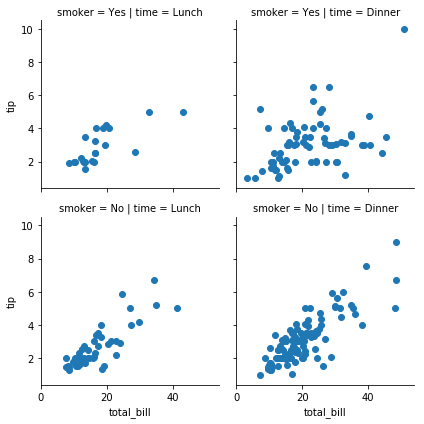

In [111]:
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(plt.scatter,'total_bill','tip') 

In [112]:
# Regression Plots

In [113]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


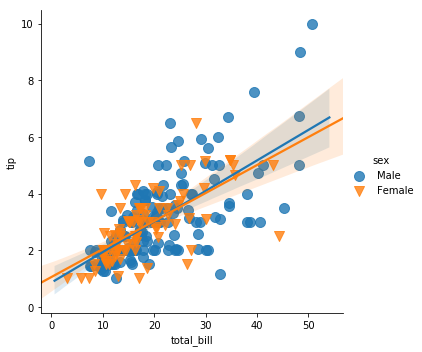

In [120]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'],
          scatter_kws={'s':100})

#scatter kws is the addressing to matplotlib to change the sizes of markers
#

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


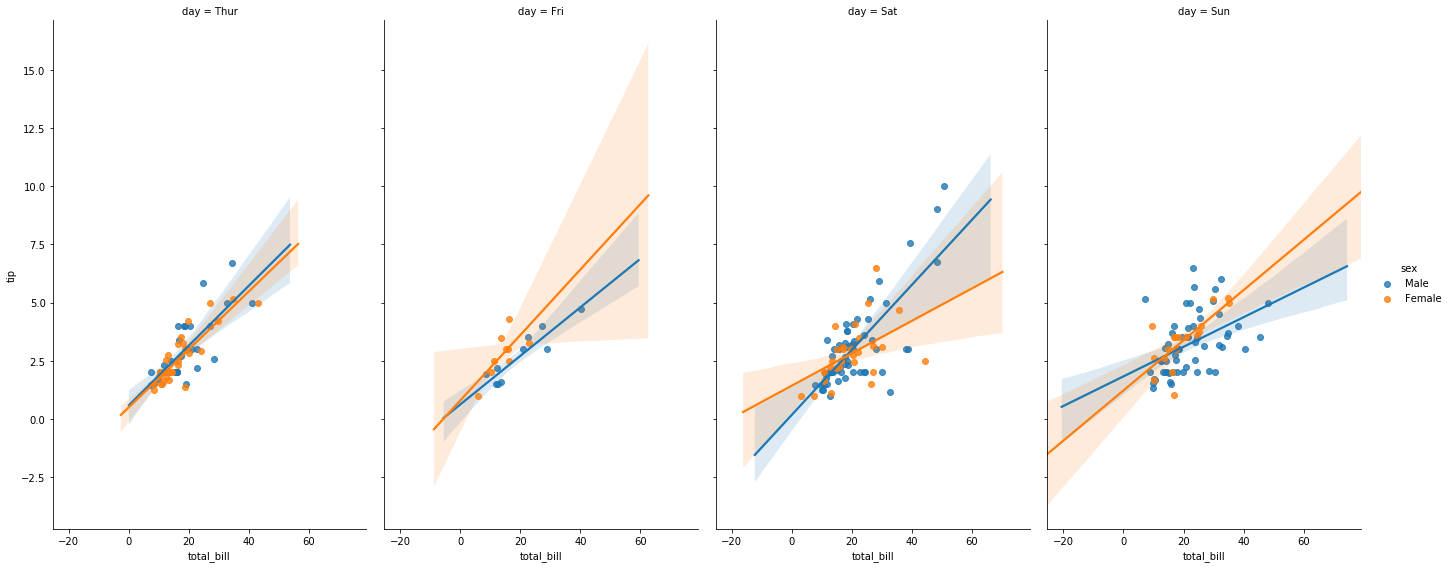

In [126]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',
          aspect=0.6, size=8  )
#col separate the data by columns

In [127]:
#style and color

In [128]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


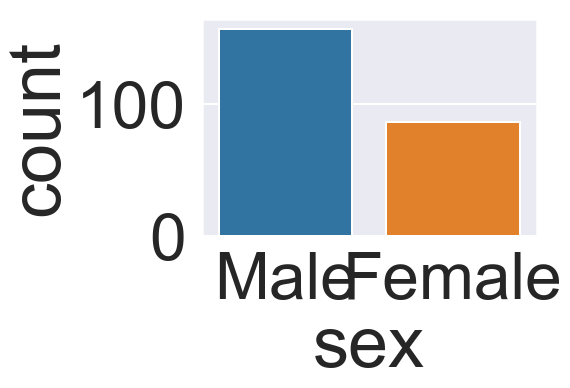

In [147]:
sns.set_style('darkgrid')
#change the background of the graph
# plt.figure(figsize=(12,3))
# sns.set_context('poster',font_scale=3)#matplotlib
sns.countplot(x='sex',data=tips)

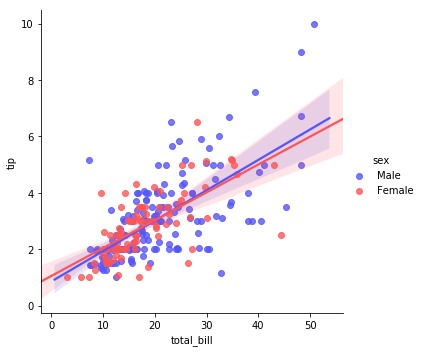

In [6]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='seismic')